## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [6]:
import pandas as pd

In [11]:
df = pd.DataFrame({'grps':list('aaabbcaabcccbbc'), 'vals':[12, 345, 3, 1, 45, 14, 4, 52, 54, 23, 235, 21, 57 ,3 87]})
df.groupby('grp')['vals'].nlargest(3).sum(level=0)

SyntaxError: invalid syntax (<ipython-input-11-1f35a3797148>, line 1)

In [9]:
slov = {}
slov['a'] = {'cv': 23}
slov[1] = 3
slov

{'a': {'cv': 23}, 1: 3}

In [16]:
a = 1
b = 2 * a if a < 0 else 3 * a
b

3

In [7]:
def foo():
    x = 4
    def bar():
        print(x)
    bar()
    x = 5
    bar()
    return bar
x = "aaa"
f = foo()
print(x)

4
5
aaa


### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv",
                   sep=",")

In [3]:
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [4]:
df.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [5]:
df.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и номинальные.

In [6]:
if df.isnull().sum().sum() > 0:
    print("There are 'NaN' values")
else:
    print("There is no 'NaN' values")

There is no 'NaN' values


In [7]:
df.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

Количественные: duration, amount, age (Показывают точное количество - продолжительности, размера кредита и возраста клиента)
  
Порядковые: status, savings, employment_duration, installment_rate, present_residence, number_credits, job, credit_history  (Либо представляют собой упорядоченные промежутки, как статус счета, сбережения, продолжительность найма, доля первоначального взноса, количество кредитов (несмотря на слово количество в датасете это порядковый признак), длительность проживания на текущем месте, либо просто является упорядоченным признаком, как работа (она проранжирована от наименее скиллд до наиболее), либо отражает степень возврата предыдущих кредитов, как кредитная история)
  
Бинарные: foreign_worker, people_liable, telephone, credit_risk (признаки которые содержат только два значения: да или нет, и для поверенных людей это больше трех или меньше)
  
Номинальные: housing, purpose, personal_status_sex, other_debtors, property, other_installment_plans (признаки, которые сложно ранжировать из-за их неупорядоченности

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
df.amount.groupby(df["purpose"]).mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
x1 = sum((df.age < 30) & (df.housing == "rent")) / sum(df.age < 30) * 100
x2 = sum((df.age > 40) & (df.housing == "rent")) / sum(df.age > 40) * 100
print(round(x1, 2), "% of younger than 30 and", round(x2, 2), "% of older than 40 rent housing")

66.67 % of younger than 30 and 68.01 % of older than 40 rent housing


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
x = sum((df.foreign_worker == "yes") & ((df.number_credits == "4-5") | (df.number_credits == ">= 6")))
print(x, "of foreign workers have more than 3 credits")

1 of foreign workers have more than 3 credits


### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

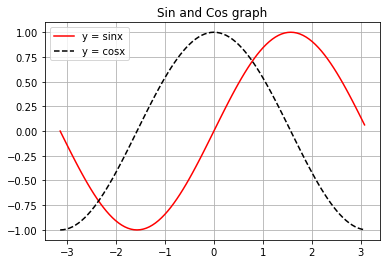

In [12]:
x = np.arange(-1*np.pi, np.pi, 2/100*np.pi)
y1 = np.sin(x)
y2 = np.cos(x)
plt.title("Sin and Cos graph")
plt.grid()
plt.plot(x,y1, color='red')
plt.plot(x,y2, linestyle='dashed', color='black')
plt.legend(('y = sinx', 'y = cosx'))

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта с помощью зеркальных горизонтальных гистограмм.

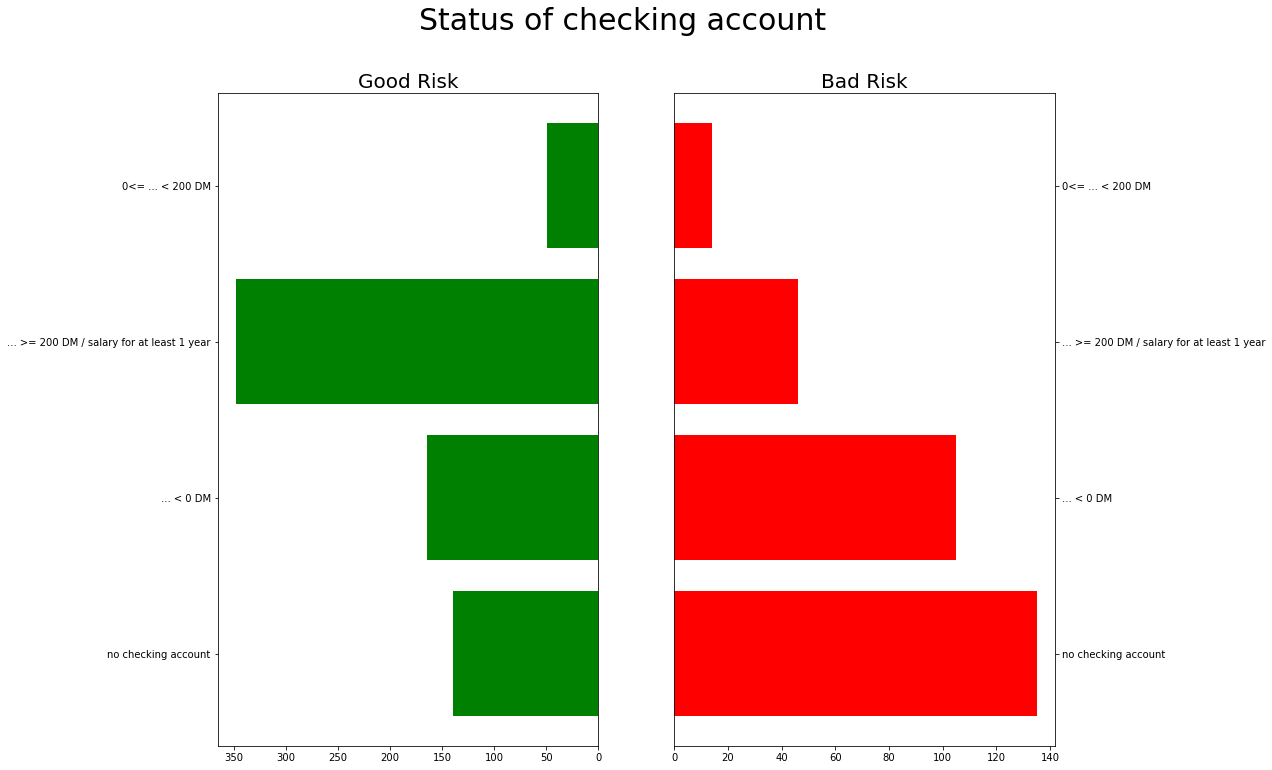

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 12))
fig.suptitle('Status of checking account', fontsize='30')
ax[0].barh(df.status.unique(), [sum((df.credit_risk=="good")&(df.status==status)) for status in df.status.unique()], color='green')
ax[0].set_title("Good Risk", fontsize='20')
ax[1].barh(df.status.unique(), [sum((df.credit_risk=="bad")&(df.status==status)) for status in df.status.unique()], color='red')
ax[1].set_title("Bad Risk", fontsize='20')
ax[0].invert_xaxis()
ax[1].yaxis.tick_right()
plt.show()

#https://www.kaggle.com/pahulpreet/german-credit-risk-analysis-beginner-s-guide

### Задание 8  (0.5 балла)

In [14]:
import seaborn as sns

Теперь рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn и более классических гистограмм. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

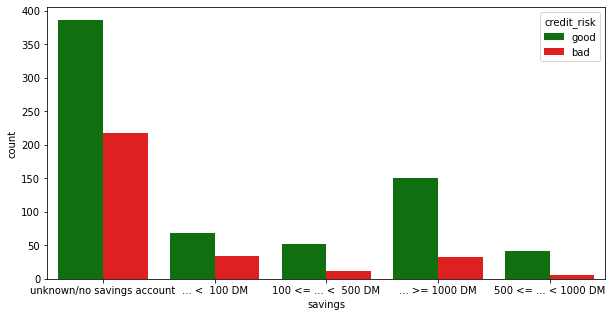

In [15]:
custom_palette = ['green', 'red']
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x="savings", hue="credit_risk", data=df, palette=custom_palette, ax=ax)

#https://pythonbasics.org/seaborn-barplot/
#https://s3.amazonaws.com/assets.datacamp.com/production/course_15192/slides/chapter4.pdf

И с точки зрения простоты кода и с точки зрения восприятия результата методы библиотеки seaborn гораздо больше подходят для данной задачи, поскольку зеркальные диаграммы не дают возможности сравнить такжже хорошо между собой значения

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например.

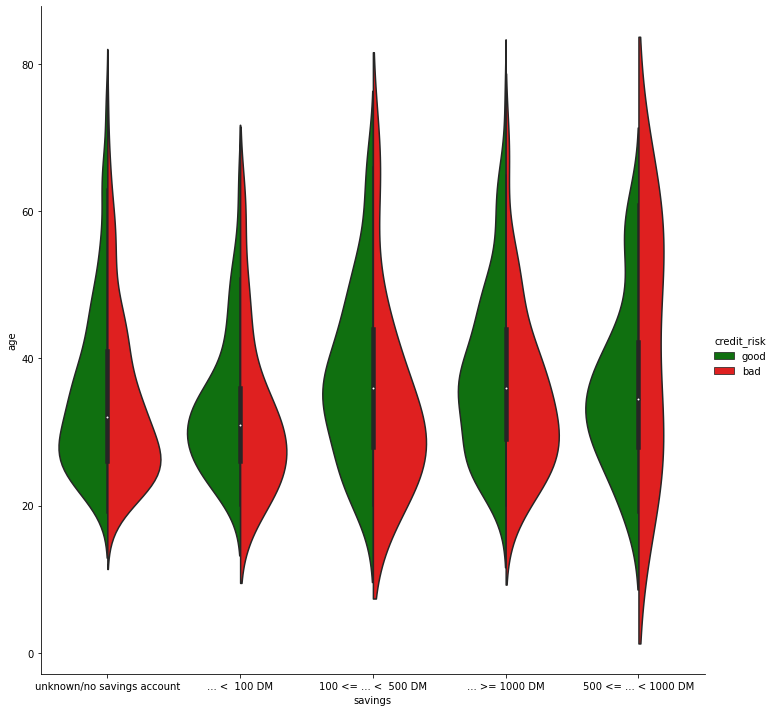

In [16]:
custom_palette = ['green', 'red']
sns.catplot(kind="violin", x="savings", y="age", hue="credit_risk", split=True, palette=custom_palette, height=10, data=df)

#https://seaborn.pydata.org/introduction.html

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

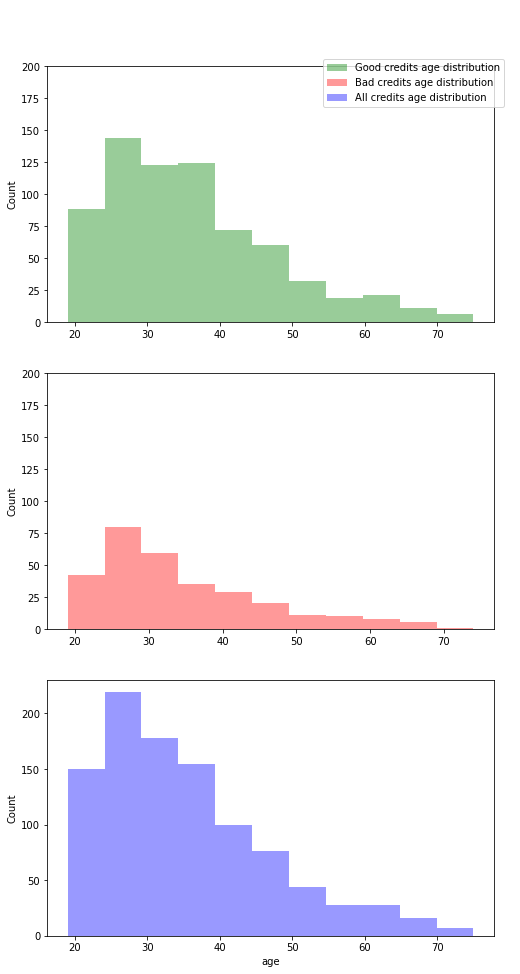

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(8, 16))
sns.distplot(df.age[df.credit_risk == "good"], bins=11, kde=False, color="g", ax=ax[0], axlabel=False, label="Good credits age distribution")
ax[0].set(ylabel = "Count", ylim=[0,200])
sns.distplot(df.age[df.credit_risk == "bad"], bins=11, kde=False, color="red", ax=ax[1], axlabel=False, label="Bad credits age distribution")
ax[1].set(ylabel = "Count", ylim=[0,200])
sns.distplot(df.age, bins=11, kde=False, color="blue", ax=ax[2], label="All credits age distribution")
ax[2].set(ylabel = "Count")
fig.legend(loc=(0.62, 0.89))

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

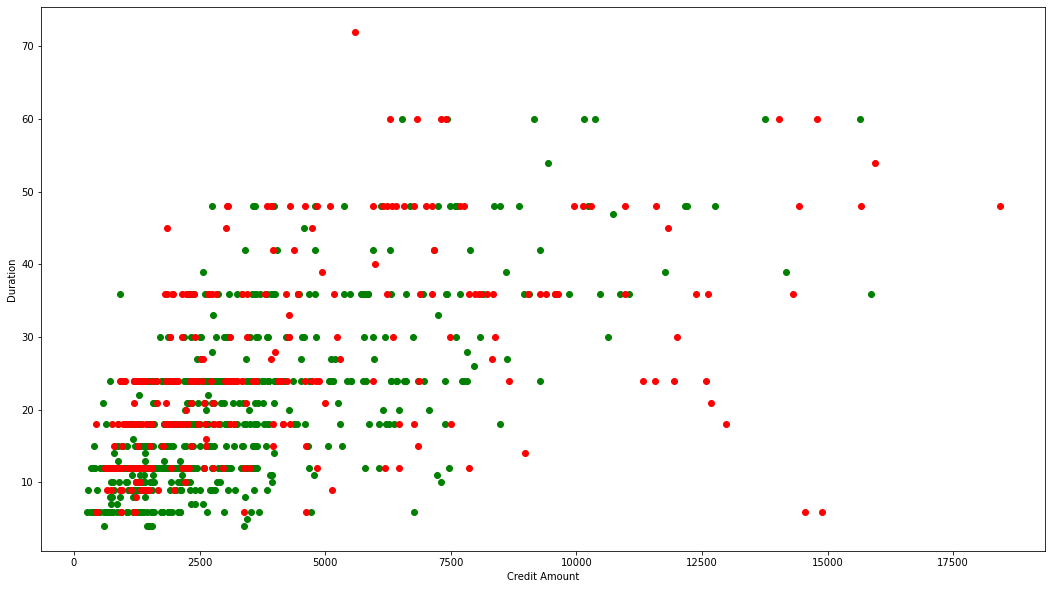

In [18]:
fig, ax = plt.subplots(figsize=(18, 10))
ax = plt.scatter(x = df.amount[df.credit_risk == "good"], y = df.duration[df.credit_risk == "good"], color='green')
ax = plt.scatter(x = df.amount[df.credit_risk == "bad"], y = df.duration[df.credit_risk == "bad"], color='red')
plt.xlabel("Credit Amount")
plt.ylabel("Duration")

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

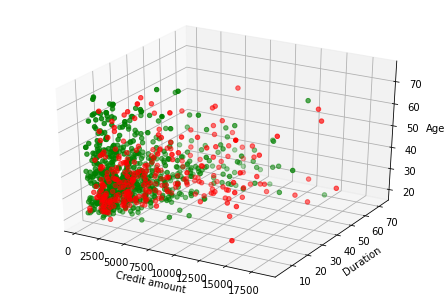

In [19]:
from mpl_toolkits.mplot3d import Axes3D

yg = df.duration[df.credit_risk == "good"]
yb = df.duration[df.credit_risk == "bad"]
xg = df.amount[df.credit_risk == "good"]
xb = df.amount[df.credit_risk == "bad"]
zg = df.age[df.credit_risk == "good"]
zb = df.age[df.credit_risk == "bad"]
#выберем в качестве осей для хороших и плохих кейсов длительность, размер и возраст


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xb, yb, zb, c='r')
ax.scatter(xg, yg , zg, c='g')
#нанесем на трехмерное пространство наши значения, разделив по кейсам
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.show()

#https://pythonru.com/biblioteki/prodvinutye-grafiki-pyplot-plt-4

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений (0, .., n). Избавьтесь от номинальных признаков.

In [20]:
df["telephone"] = (df["telephone"] == 'yes (under customer name)')*1 
df["foreign_worker"] = (df["foreign_worker"] == 'yes')*1 
df["people_liable"] = (df["people_liable"] == '3 or more')*1
df["credit_risk"] = (df["credit_risk"] == 'good')*1

Кодируем бинарные признаки как 0 и 1, смотрим значения через value_counts (удалено из кода для большей стройности)
  
Телефон - если есть, значит до должника можно дозвониться, значит меньше шанс потери контакта
  
Иностранный работник - если да, есть шанс что он не выплатит и уедет к себе в страну

Количество поручителей - больше трех - человеку можно доверить большую сумму

In [21]:
df["status"] = df["status"].apply(lambda x: 0 if x=="no checking account" else (1 if x=="... < 0 DM" else(2 if x=='0<= ... < 200 DM' else 3)))
df["savings"] = df["savings"].apply(lambda x: 0 if x=="unknown/no savings account" else (1 if x=="... <  100 DM" else(2 if x=='100 <= ... <  500 DM' else (3 if x=='500 <= ... < 1000 DM' else 4))))
df["employment_duration"] = df["employment_duration"].apply(lambda x: 0 if x=="unemployed" else (1 if x=="< 1 yr" else(2 if x=='1 <= ... < 4 yrs' else (3 if x=='4 <= ... < 7 yrs' else 4))))
df["installment_rate"] = df["installment_rate"].apply(lambda x: 0 if x=="< 20" else (1 if x=="20 <= ... < 25" else(2 if x=='25 <= ... < 35' else 3)))
df["present_residence"] = df["present_residence"].apply(lambda x: 0 if x=="< 1 yr" else(1 if x=='1 <= ... < 4 yrs' else (2 if x=='4 <= ... < 7 yrs' else 3)))
df["number_credits"] = df["number_credits"].apply(lambda x: 0 if x=="1" else (1 if x=="2-3" else(2 if x=='4-5' else 3)))
df["job"] = df["job"].apply(lambda x: 0 if x=="unemployed/unskilled - non-resident" else (1 if x=="unskilled - resident" else(2 if x=='skilled employee/official' else 3)))
df["credit_history"] = df["credit_history"].apply(lambda x: 0 if x=="critical account/other credits elsewhere" else (1 if x=="delay in paying off in the past" else(2 if x=='no credits taken/all credits paid back duly' else (3 if x=='all credits at this bank paid back duly' else 4))))

Status - чем выше объем средств на счетах банка, тем выше число в этом признаке  
  
Savings - выше сбережения - выше значение
  
Employment duration - чем дольше человек работает, тем он прочнее закрепляется на позиции, тем сложнее его уволить, то есть это положительно влияет на платежеспособность
  
Installment rate - чем больше процент первого взноса, тем значит меньше придется платить по кредиту, тем надежнее заемщик
  
Present residense - если человек давно живет в этом месте, то значит он не уедет с кредитными деньгами, например в другую страну
  
Number credits - единственная переменная, которая будет влиять отрицательно - чем больше кредитов, тем больше значение параметра, но тем хуже кредитный рейтинг
  
Job - в зависимости от уровня скилла и позиции можно сформировать рейтинг работ, где 0 - самые непрофессиональные нерезиденты, а самое высокое значение у руководящих позиций
  
Credit History - чем чище кредитная история, тем выше значения переменной после преобразования в числовой формат

In [22]:
df.drop(['purpose','personal_status_sex','other_debtors', 'property', 'other_installment_plans', 'housing'], inplace=True, axis=1)

In [23]:
df.head(10)

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,3,1049,0,1,0,3,21,0,2,0,0,0,1
1,0,9,3,2799,0,2,2,1,36,1,2,1,0,0,1
2,1,12,2,841,1,3,2,3,23,0,1,0,0,0,1
3,0,12,3,2122,0,2,1,1,39,1,1,1,0,1,1
4,0,12,3,2171,0,2,0,3,38,1,1,0,0,1,1
5,0,10,3,2241,0,1,3,2,48,1,1,1,0,1,1
6,0,8,3,3398,0,3,3,3,39,1,1,0,0,1,1
7,0,6,3,1361,0,1,2,3,40,0,1,1,0,1,1
8,3,18,3,1098,0,0,0,3,65,1,0,0,0,0,1
9,1,24,2,3758,2,0,3,3,23,0,0,0,0,0,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте предложить какую-нибудь формулу для вычисления по предоставленному набору признаков целевой переменной, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. 
Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать целевую переменную, положительный или отрицательный прогноз по кредиту (0 или 1).
Для подготовки и проверки формулы нужно будет соответственно разделить данные на 2 набора признаков и соответствующие им векторы целевых переменных. Удобно воспользоваться для этого подходящей функцией из sklearn.

In [24]:
def normal(x):
    av = x.mean()
    std = x.std()
    x = (x - av)/std
    return x
#пропишем функцию нормализации данных

In [25]:
df1=normal(df.iloc[:,:14]) #пронормируем наши параметры
df1["credit_risk"] = df.credit_risk #вставим в наш датасет к пронормированным параметрам значения результатов
df1

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,-1.253938,-0.240737,0.761304,-0.787263,-0.699357,-1.145405,-0.918018,1.046463,-1.280932,-0.704573,0.146876,-0.428075,-0.822906,-0.195916,1
1,-1.253938,-0.987079,0.761304,-0.167301,-0.699357,-0.317800,0.869748,-0.765594,0.040343,1.026565,0.146876,2.333701,-0.822906,-0.195916,1
2,-0.458797,-0.738298,-0.376669,-0.860950,-0.066455,0.509805,0.869748,1.046463,-1.104762,-0.704573,-1.383079,-0.428075,-0.822906,-0.195916,1
3,-1.253938,-0.738298,0.761304,-0.407137,-0.699357,-0.317800,-0.024135,-0.765594,0.304598,1.026565,-1.383079,2.333701,-0.822906,5.099118,1
4,-1.253938,-0.738298,0.761304,-0.389779,-0.699357,-0.317800,-0.918018,1.046463,0.216513,1.026565,-1.383079,-0.428075,-0.822906,5.099118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.253938,0.256825,-0.376669,-0.454963,-0.699357,-0.317800,0.869748,1.046463,-1.280932,-0.704573,-1.383079,2.333701,-0.822906,-0.195916,0
996,-1.253938,0.256825,-0.376669,-0.343016,-0.699357,1.337409,-0.918018,-1.671623,0.833108,-0.704573,0.146876,-0.428075,-0.822906,-0.195916,0
997,1.131486,0.008044,0.761304,3.333184,1.832252,1.337409,-0.918018,1.046463,-0.488167,-0.704573,1.676831,-0.428075,1.213990,-0.195916,0
998,-0.458797,-0.738298,-0.376669,1.132495,1.832252,-1.973010,0.869748,-1.671623,1.449703,-0.704573,1.676831,-0.428075,1.213990,-0.195916,0


In [26]:
from sklearn.utils import shuffle 
df1 = shuffle(df1) #перемешаем данные

In [29]:
xy_train, xy_test = df1.iloc[:600, :], df1.iloc[600:, :] #для обучения и теста отоберем 600 первых и 400 последних строк
#пусть выборка и ответ по ней хранятся в одном датафрейме для удобства (не будем делить х и у)

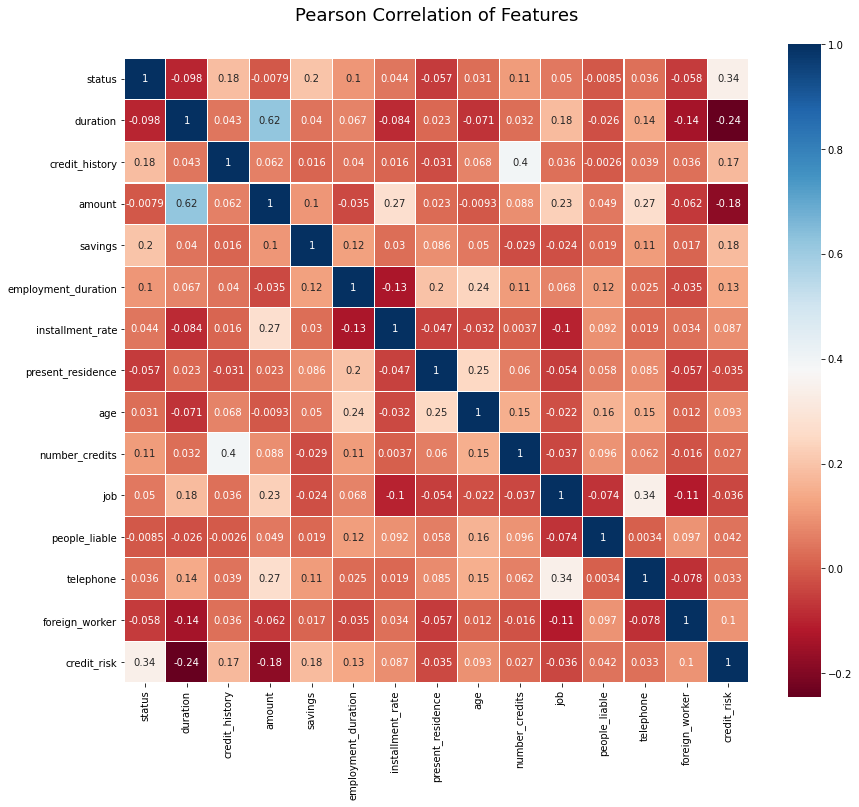

In [30]:
NumericData = xy_train.select_dtypes(include=[np.number])
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
#построим корреляционную матрицу чтобы посмотреть зависимость между переменными
#ИДЕЯ - возьмем корреляции на обучающей выборке как веса для тестовой

In [31]:
from scipy.stats.stats import pearsonr
xy_train["predict"] = xy_train.status*pearsonr(xy_train.status, xy_train.credit_risk)[0]+xy_train.duration*pearsonr(xy_train.duration, xy_train.credit_risk)[0]+xy_train.credit_history*pearsonr(xy_train.credit_history, xy_train.credit_risk)[0]+xy_train.amount*pearsonr(xy_train.amount, xy_train.credit_risk)[0]+xy_train.savings*pearsonr(xy_train.savings, xy_train.credit_risk)[0]+xy_train.employment_duration*pearsonr(xy_train.employment_duration, xy_train.credit_risk)[0]+xy_train.installment_rate*pearsonr(xy_train.installment_rate, xy_train.credit_risk)[0]+xy_train.present_residence*pearsonr(xy_train.present_residence, xy_train.credit_risk)[0]+xy_train.number_credits*pearsonr(xy_train.number_credits, xy_train.credit_risk)[0]+xy_train.job*pearsonr(xy_train.job, xy_train.credit_risk)[0]+xy_train.people_liable*pearsonr(xy_train.people_liable, xy_train.credit_risk)[0]+xy_train.telephone*pearsonr(xy_train.telephone, xy_train.credit_risk)[0]+xy_train.foreign_worker*pearsonr(xy_train.foreign_worker, xy_train.credit_risk)[0]
#составим столбец предикт, в котором будем вычислять нашу функцию предсказания кредита, равную сумме параметров умноженных на корреляции в качестве весов

<ipython-input-31-289735ab4e57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_train["predict"] = xy_train.status*pearsonr(xy_train.status, xy_train.credit_risk)[0]+xy_train.duration*pearsonr(xy_train.duration, xy_train.credit_risk)[0]+xy_train.credit_history*pearsonr(xy_train.credit_history, xy_train.credit_risk)[0]+xy_train.amount*pearsonr(xy_train.amount, xy_train.credit_risk)[0]+xy_train.savings*pearsonr(xy_train.savings, xy_train.credit_risk)[0]+xy_train.employment_duration*pearsonr(xy_train.employment_duration, xy_train.credit_risk)[0]+xy_train.installment_rate*pearsonr(xy_train.installment_rate, xy_train.credit_risk)[0]+xy_train.present_residence*pearsonr(xy_train.present_residence, xy_train.credit_risk)[0]+xy_train.number_credits*pea

In [32]:
xy_train

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,predict
742,-1.253938,0.256825,-0.376669,-0.097511,1.832252,-0.317800,0.869748,1.046463,-1.369017,-0.704573,0.146876,-0.428075,-0.822906,-0.195916,0,-0.301008
841,-0.458797,-0.240737,0.761304,-0.475865,-0.699357,-1.145405,0.869748,-0.765594,-0.400082,1.026565,-1.383079,-0.428075,-0.822906,-0.195916,0,-0.045087
494,-1.253938,-0.738298,0.761304,-0.659728,-0.699357,1.337409,-0.918018,0.140434,1.625873,-0.704573,0.146876,-0.428075,-0.822906,-0.195916,1,-0.116015
69,1.131486,0.256825,1.899277,-0.439021,-0.699357,1.337409,-0.918018,1.046463,2.154383,1.026565,0.146876,-0.428075,1.213990,-0.195916,1,0.693952
530,1.131486,-1.401713,0.761304,-0.626427,-0.699357,0.509805,0.869748,-1.671623,0.568853,1.026565,-1.383079,2.333701,-0.822906,-0.195916,1,1.177476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.336345,-1.235859,0.761304,-0.787972,-0.699357,-0.317800,0.869748,1.046463,1.273533,-0.704573,-1.383079,-0.428075,-0.822906,-0.195916,1,0.525506
865,0.336345,-0.489517,0.761304,-0.708616,1.832252,-0.317800,-0.024135,1.046463,0.304598,1.026565,0.146876,-0.428075,1.213990,-0.195916,0,0.765238
277,-0.458797,0.008044,0.761304,0.134887,-0.699357,0.509805,0.869748,0.140434,-0.752422,1.026565,0.146876,-0.428075,-0.822906,-0.195916,1,-0.077820
338,1.131486,-0.904152,-0.376669,-0.149942,-0.066455,-0.317800,1.763631,-0.765594,-0.311997,-0.704573,0.146876,2.333701,-0.822906,-0.195916,1,0.719272


In [33]:
xy_train["target"]=((xy_train.predict>xy_train.predict.mean())*1 == xy_train.credit_risk)*1
#проверим, попала ли наша функция в предсказания - если значение выше среднего, риск хороший, если меньше - плохой

<ipython-input-33-e8be71437c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_train["target"]=((xy_train.predict>xy_train.predict.mean())*1 == xy_train.credit_risk)*1


In [34]:
accuracy = xy_train.target.sum()/xy_train.target.count()
print("accuracy", accuracy, "for trainning")
#посчитаем долю правильных ответов для обучающей выборки

0.7066666666666667 for trainning


In [38]:
xy_test["predict"] = xy_test.status*pearsonr(xy_train.status, xy_train.credit_risk)[0]+xy_test.duration*pearsonr(xy_train.duration, xy_train.credit_risk)[0]+xy_test.credit_history*pearsonr(xy_train.credit_history, xy_train.credit_risk)[0]+xy_test.amount*pearsonr(xy_train.amount, xy_train.credit_risk)[0]+xy_test.savings*pearsonr(xy_train.savings, xy_train.credit_risk)[0]+xy_test.employment_duration*pearsonr(xy_train.employment_duration, xy_train.credit_risk)[0]+xy_test.installment_rate*pearsonr(xy_train.installment_rate, xy_train.credit_risk)[0]+xy_test.present_residence*pearsonr(xy_train.present_residence, xy_train.credit_risk)[0]+xy_test.number_credits*pearsonr(xy_train.number_credits, xy_train.credit_risk)[0]+xy_test.job*pearsonr(xy_train.job, xy_train.credit_risk)[0]+xy_test.people_liable*pearsonr(xy_train.people_liable, xy_train.credit_risk)[0]+xy_test.telephone*pearsonr(xy_train.telephone, xy_train.credit_risk)[0]+xy_test.foreign_worker*pearsonr(xy_train.foreign_worker, xy_train.credit_risk)[0]
xy_test["target"]=((xy_test.predict>xy_test.predict.mean())*1 == xy_test.credit_risk)*1
accuracy1 = xy_test.target.sum()/xy_test.target.count()
print("accuracy", accuracy1, "for test")
#проделаем то же самое для тестовой выборки
#доля правильных ответов 0.7 и 0.69 - лучше чем константа - формула более-менее хорошо справилась со своей задачей!!!

accuracy 0.69 for test


<ipython-input-38-5314ef0594fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_test["predict"] = xy_test.status*pearsonr(xy_train.status, xy_train.credit_risk)[0]+xy_test.duration*pearsonr(xy_train.duration, xy_train.credit_risk)[0]+xy_test.credit_history*pearsonr(xy_train.credit_history, xy_train.credit_risk)[0]+xy_test.amount*pearsonr(xy_train.amount, xy_train.credit_risk)[0]+xy_test.savings*pearsonr(xy_train.savings, xy_train.credit_risk)[0]+xy_test.employment_duration*pearsonr(xy_train.employment_duration, xy_train.credit_risk)[0]+xy_test.installment_rate*pearsonr(xy_train.installment_rate, xy_train.credit_risk)[0]+xy_test.present_residence*pearsonr(xy_train.present_residence, xy_train.credit_risk)[0]+xy_test.number_credits*pearsonr(xy_t